Task **1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/fake_reviews_dataset - fake_reviews_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,category,rating,label,text_
1,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
2,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
3,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
4,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."


In [ ]:
df.columns = df.iloc[0]
df = df.reset_index(drop=True)
df = df.iloc[1:]

In [ ]:
df.head()

,category,rating,label,text_
1,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
2,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
3,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
4,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
5,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df.shape

(40432, 4)

In [ ]:
df.isnull().sum()

,0
0,
category,0
rating,0
label,0
text_,0


In [ ]:
df['text_'][1]

'Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty'

In [ ]:
df['category'].value_counts()

,count
category,
Kindle_Store_5,4730
Books_5,4370
Pet_Supplies_5,4254
Home_and_Kitchen_5,4056
Electronics_5,3988
Sports_and_Outdoors_5,3946
Tools_and_Home_Improvement_5,3858
Clothing_Shoes_and_Jewelry_5,3848
Toys_and_Games_5,3794


In [ ]:
df = df.drop_duplicates()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    words = text.split()

    words = [word for word in words if word not in stop_words]

    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

In [ ]:
df['text_'] = df['text_'].apply(preprocess_text)

In [ ]:
df['text_'][1]

'love well made sturdy comfortable love itvery pretty'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
tfidf_matrix = tfidf.fit_transform(df['text_'])

In [ ]:
tfidf_matrix.shape

(40419, 5000)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [ ]:
X = tfidf_matrix
y = df['category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
history = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
history.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,714 (1.22 MB)

 Trainable params: 320,714 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 476s 470ms/step - accuracy: 0.5068 - loss: 1.7003 - val_accuracy: 0.7728 - val_loss: 0.7503
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 102s 100ms/step - accuracy: 0.7673 - loss: 0.7273 - val_accuracy: 0.7827 - val_loss: 0.6307
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.8141 - loss: 0.5721 - val_accuracy: 0.7859 - val_loss: 0.6086
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.8331 - loss: 0.5007 - val_accuracy: 0.7864 - val_loss: 0.6038
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.8550 - loss: 0.4387 - val_accuracy: 0.7869 - val_loss: 0.6094
Epoch 6/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8651 - loss: 0.4103 - val_accuracy: 0.7836 - val_loss: 0.6220
Epoch 7/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.8770 - loss: 0.3734 - val_accuracy: 0.7829 - val_loss: 0.6333
Epoch 8/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.88

# Task 2


In [190]:
import tensorflow as tf
from sklearn.metrics import classification_report

df["fake_label"] = df["label"].map({"CG": 0, "OR": 1})
y_fake = df["fake_label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y_fake, test_size=0.2, random_state=42
)

model_fake = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_fake.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_fake.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

y_pred_prob = model_fake.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\nFAKE / REAL CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

Epoch 1/10
 29/228 ━━━━━━━━━━━━━━━━━━━━ 2:45 829ms/step - accuracy: 0.0000e+00 - loss: nan

KeyboardInterrupt: 

Task **3**

Generating word cloud for category: Books_5


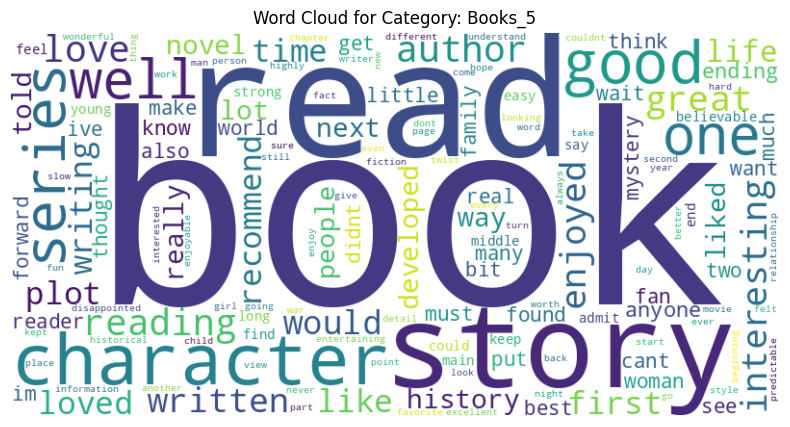

Generating word cloud for category: Clothing_Shoes_and_Jewelry_5


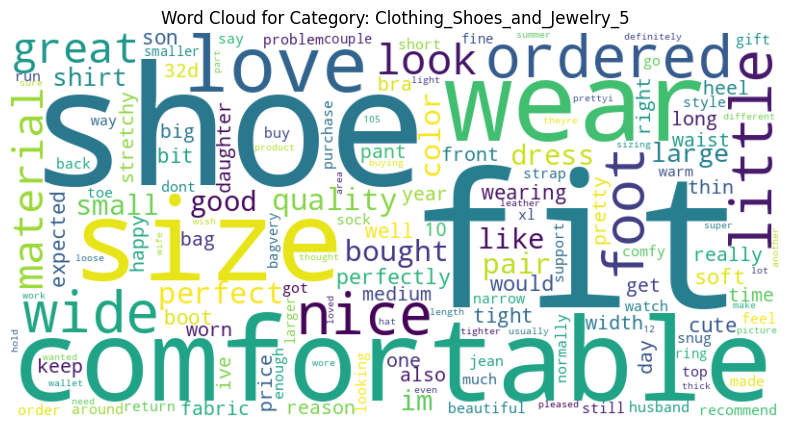

Generating word cloud for category: Electronics_5


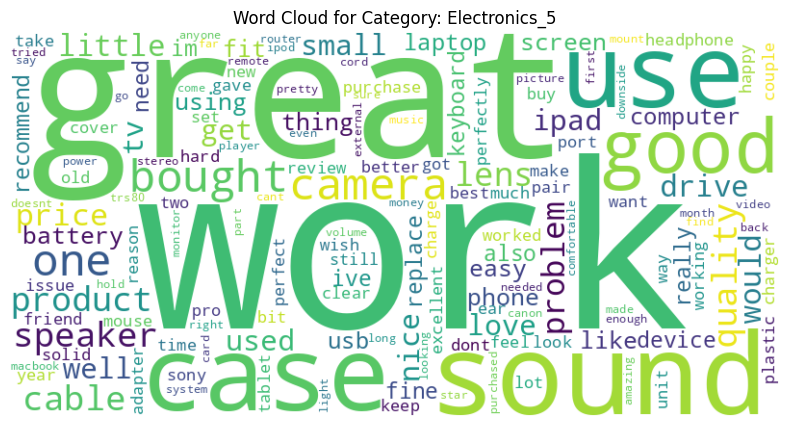

Generating word cloud for category: Home_and_Kitchen_5


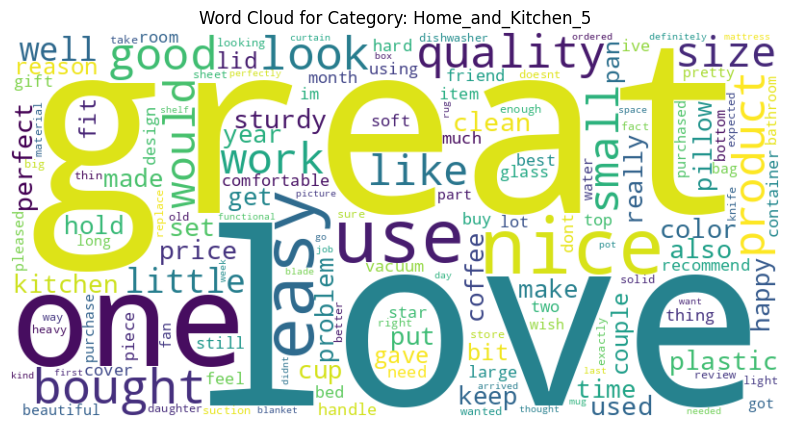

Generating word cloud for category: Kindle_Store_5


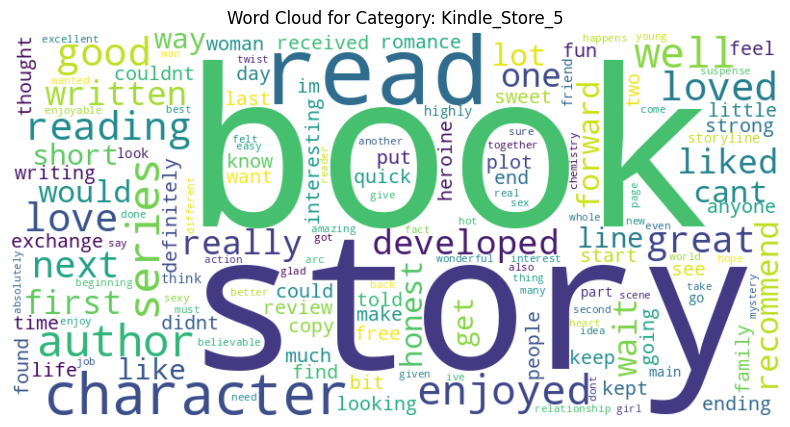

Generating word cloud for category: Movies_and_TV_5


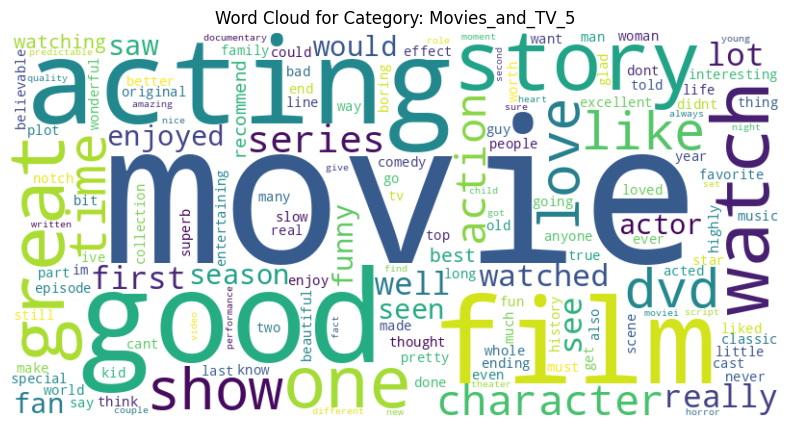

Generating word cloud for category: Pet_Supplies_5


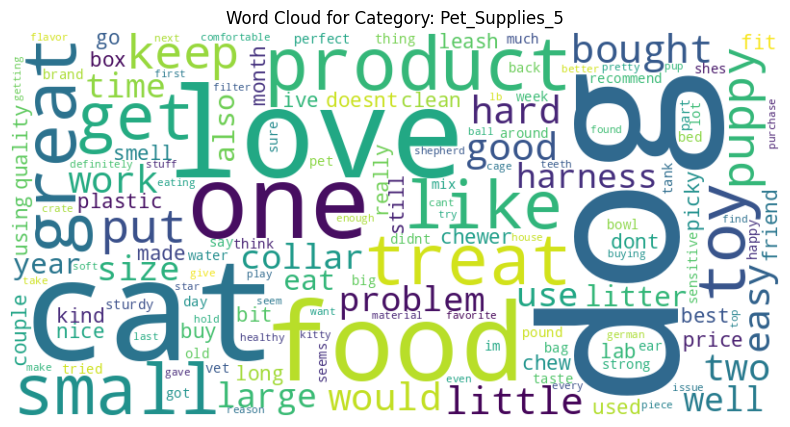

Generating word cloud for category: Sports_and_Outdoors_5


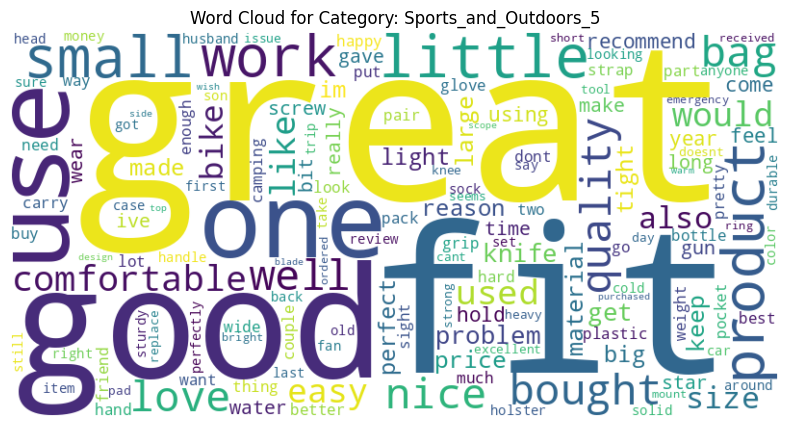

Generating word cloud for category: Tools_and_Home_Improvement_5


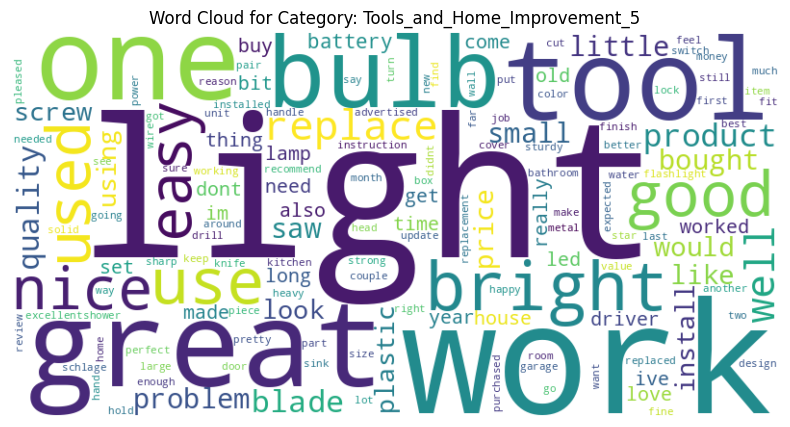

Generating word cloud for category: Toys_and_Games_5


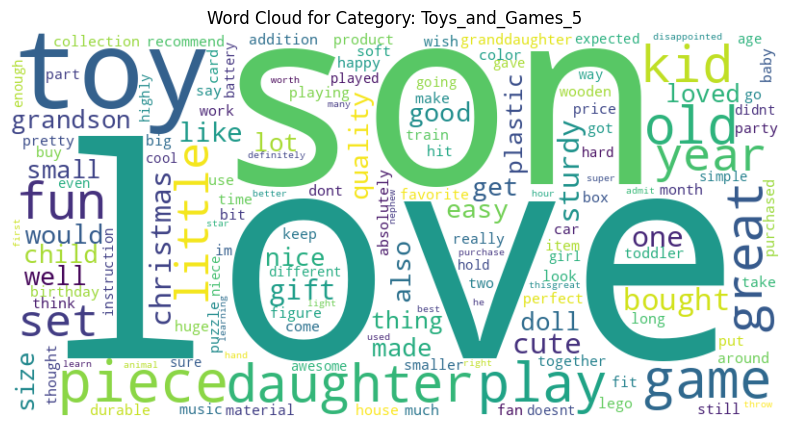

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feature_names = tfidf.get_feature_names_out()

# Iterate with index `i` to get the numerical label and `category_name` for display
for i, category_name in enumerate(le.classes_):
    print(f"Generating word cloud for category: {category_name}")

    # Use the numerical index 'i' for comparison with df["category"]
    idx = df["category"] == i
    X_cat = X[idx.values]

    # Check if X_cat is empty to prevent ZeroDivisionError
    if X_cat.shape[0] == 0:
        print(f"Warning: No data found for category '{category_name}', skipping word cloud generation.")
        continue

    mean_tfidf = np.mean(X_cat, axis=0)

    word_freq = {
        word: score
        for word, score in zip(feature_names, mean_tfidf.A1) # .A1 converts sparse matrix row to dense array
        if score > 0
    }

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=150
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {category_name}")
    plt.show()